Instruction: Team project. Work with your teamate and submit one file to BBlearn by the end of 4/7/2023.
<br> You are allowed to use any resource online or offline. 

1. SGD with momentum
<br> Read the following menual, and try to understand the pseudo-code.
<br> https://pytorch.org/docs/stable/generated/torch.optim.SGD.html
<br> (a) Question: How does the momentum parameter plays a role in the SGD function?

Answer:

(b) Add the momentum parameter in the following code (an example we did in class), plot the loss function before and after adding the momentum parameter, and see which one goes faster. If you set up the parameter correctly, you should see a faster convergence.

torch.Size([100, 1])
torch.Size([100])


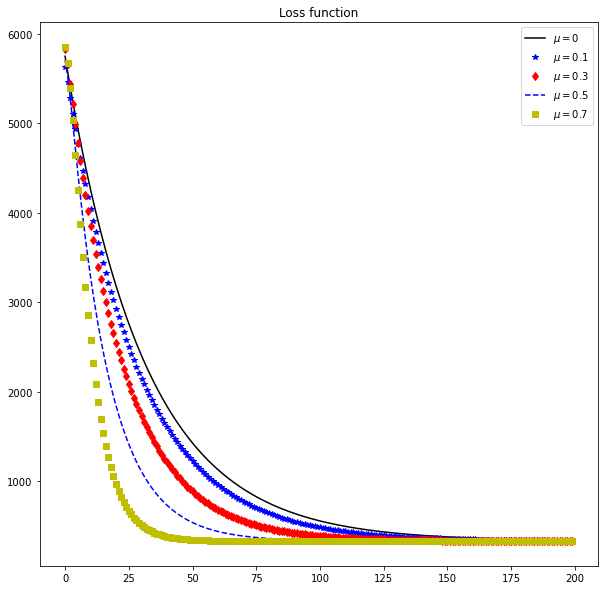

In [30]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
# 0. prepare data
x_np,y_np = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
#convert to torch tensor, it was double data type, want to convert to float32
x=torch.from_numpy(x_np.astype(np.float32))
y=torch.from_numpy(y_np.astype(np.float32))
print(x.shape)
print(y.shape)
#want to change the shape of y to one column
y=y.view(y.shape[0],1)
#print(y)
n_samples,n_features=x.shape
# 1. model
input_size=n_features
output_size=1

# 2. loss and optimizer
learning_rate=0.01
loss_nn=nn.MSELoss()

# 3. training loop
n_epochs=200
#save loss for figure
l_no_momt=torch.ones(n_epochs)
w_no_momt=torch.ones(n_epochs)
b_no_momt=torch.ones(n_epochs)

mu = [0,0.1,0.3,0.5,0.7]
fig,ax = plt.subplots(figsize=(10,10))
styles = ['k','b*','rd','b--','ys']

for m in zip(mu,styles): 
    model=nn.Linear(input_size,output_size)
    optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=m[0])
    
    for epoch in range(n_epochs):
        
        #forward pass
        y_predicted = model(x)
        loss = loss_nn(y_predicted,y)

        #backward pass
        loss.backward()

        #update
        optimizer.step()

        optimizer.zero_grad()

        [w, b] = model.parameters()

        l_no_momt[epoch]=loss.item()
        w_no_momt[epoch]=w.item()
        b_no_momt[epoch]=b.item()
        
        
    lbl = '$\mu=$'+str(m[0])
    ax.plot(list(range(n_epochs)),l_no_momt,m[1],label=lbl)
    title = 'Loss function'
    ax.set_title(title)
    ax.legend()

2.  Object Oriented Programming (OOP)
<br> To better understand how Pytorch, or in gerneral how Python class works, we covered the OOP in class. 
<br> Define a class named my_matrix. In this class, implement the following methods 
    - shape: return the number of rows, and number of columns
    - get: that take the number of rows, the number of columns as parameters, and returns the content of cell corresponding to row number col number 
    - scalar_mult: that take a scalar and return a new matrix which is the scalar product of matrix x val
    
Create an example to test if your class is functioning as you expected. You can extend on the following code.

In [31]:
import numpy as np
class my_matrix:
    def __init__(self,matrix):
        self.matrix = matrix
    def shape(self):
        return self.matrix.shape
    def get(self,row,col):
        return self.matrix[row,col]
    def scalar_mult(self,c):
        return c*self.matrix

In [42]:
import numpy as np
a=np.array([[1, 2],[3,4],[5,6]])
b=my_matrix(a)
print(b.shape())
print(b.get(1,1))

(3, 2)
4


In [43]:
a.shape

(3, 2)

3.  Inherite the class you defined in problem 2 to define the new class named m2vector. Add the following method
- resize: resize the matrix to have only one row if the parameter row=1, otherwise, resize it to a column vector.

In [44]:
class m2vector(my_matrix):
    def resize(self,row):
        if row==1:
            reshaped = self.matrix.reshape(1,self.shape()[0]*self.shape()[1])
            return reshaped
        else:
            return self.matrix.reshape(self.shape()[0]*self.shape()[1],1)
            

In [45]:
c = m2vector(a)
print(c.resize(1))
print(c.resize(2))

[[1 2 3 4 5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


4. Super class. Fill out the code for area_2 function.
And then run pyramid.area_2() after you defined the object pyramid that has base equal to 2, and slant height equal to 4. The result should be 20, same as the result of pyramid.area().

In [3]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

class Square(Rectangle):
    def __init__(self, length):
        super().__init__(length, length)

class Triangle:
    def __init__(self, base, height):
        self.base = base
        self.height = height

    def tri_area(self):
        return 0.5 * self.base * self.height

class RightPyramid(Square, Triangle):
    def __init__(self, base, slant_height):
        self.base = base
        self.slant_height = slant_height
        Triangle.__init__(self, base=self.base, height=slant_height)
        Square.__init__(self, length=self.base)

    def area(self):
        base_area = super().area()
        perimeter = super().perimeter()
        return 0.5 * perimeter * self.slant_height + base_area

    def area_2(self):
        base_area = super().area()# fill out the line to computer area here
        triangle_area = super().tri_area()# fill out the line to computer each triangle area here
        return triangle_area * 4 + base_area

In [6]:
pyramid = RightPyramid(base=2, slant_height=4)
pyramid.area_2()

20.0

5. Here is the code we developed in class, split 20% of data as test set, and train a neural network to predict the type of wine (first column in the wine.csv file).

In [213]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# gradient computation etc. not efficient for whole data set
# -> divide dataset into small batches

'''
# training loop
for epoch in range(num_epochs):
    # loop over all batches
    for i in range(total_batches):
        batch_x, batch_y = ...
'''

# epoch = one forward and backward pass of ALL training samples
# batch_size = number of training samples used in one forward/backward pass
# number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of sampes
# e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch
 
# --> DataLoader can do the batch computation for us

# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class WineDataset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]
        

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


# create dataset
dataset = WineDataset()

#Change the output for multi-calss classification, class 1 is vector [1,0,0], class 2 is [0,1,0], etc.
length = dataset.__len__()
y = np.zeros([length,3])
y = torch.tensor([y[i] for i in range(length)],dtype=torch.float32)
y[list(range(length)),dataset[:][1].numpy().reshape(1,length)-1]=1


x_train, x_test, y_train, y_test = train_test_split(
dataset[:][0], y, test_size=0.2, random_state=1)

# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train = scaler.transform(x_train)

# Scale the test set
x_test = scaler.transform(x_test)

#for i in [x_train, x_test, y_train, y_test]:
#     i = torch.tensor(i,dtype=torch.float32)



# get first sample and unpack
#first_data = dataset[0]
#features, labels = first_data
#print(features, labels)

# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
# num_workers: faster loading with multiple subprocesses
# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!
train_loader = DataLoader(dataset=[(x_train[i],y_train[i]) 
                                                for i in range(len(y_train))],
                          batch_size=4,
                          shuffle=True,
                          num_workers=0)

# convert to an iterator and look at one random sample
#dataiter = iter(train_loader)
#data = next(dataiter)
#features, labels = data
#print(features, labels)


# Neural Network
class PredictWine(nn.Module):
    def __init__(self):
        super(PredictWine,self).__init__()
        #define Layers
        self.network=nn.Sequential(
            nn.Linear(13,8),
            nn.Sigmoid(),
            nn.Linear(8,3),
            
            nn.Softmax(dim=1),
            
            
            #nn.Linear(input_dim[3],output_dim[3]),
        )       
        
    def forward(self,x):
            y=self.network(x)
            return y

        
model = PredictWine() 

L_vec=[]
epoch_vec=[]

#Loss
loss_nn = nn.CrossEntropyLoss()
#Learning rate
lr=0.01

#Gradient descent
optimizer=torch.optim.SGD(model.parameters(),lr=lr,momentum=0.5)

# Dummy Training loop
num_epochs = 100
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        
       # x_train = inputs
        #y_train = labels
        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        # Run your training process
        y_pred = model(inputs)

        #Loss function
        L = loss_nn(labels,y_pred)

        L_vec=L_vec+[L.detach().numpy()]

        epoch_vec=epoch_vec+[epoch]

        L.backward()

        #Parameter update
        optimizer.step()
        optimizer.zero_grad()
        
        
#Plot loss
import matplotlib.pyplot as plt
plt.scatter(epoch_vec,L_vec)



#The testing accuracy
from sklearn.metrics import r2_score
y_pred = model(x_test)
accuracy = r2_score(y_test,y_pred.detach())
print('Test accuracy is ',accuracy)

178 45


RuntimeError: mat1 and mat2 must have the same dtype

In [16]:
xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)

In [212]:
[(x_train[i],y_train[i]) for i in range(len(y_train))]

[(array([-1.23907777, -0.76709154,  0.23605041,  0.7420349 , -0.92395453,
         -1.28981654, -0.72706901,  1.11530947,  0.11502851, -0.60487222,
          0.39472032,  0.08573365, -0.97342953]),
  tensor([0., 1., 0.])),
 (array([-0.34016797, -0.50958095, -0.55347927, -0.21996435, -0.92395453,
         -0.09844212,  0.54582695, -0.89048196,  0.3552351 , -0.47703786,
          0.87437921,  0.77219375, -0.09029683]),
  tensor([0., 1., 0.])),
 (array([-1.13919904, -0.87009579,  0.52315179,  0.89234725, -1.06805288,
          0.47341743,  0.30715894,  0.53028705, -0.89727083, -0.90315212,
         -0.12854363,  0.84224063, -1.1908675 ]),
  tensor([0., 1., 0.])),
 (array([ 1.38274198, -0.32932347,  0.16427506, -0.21996435,  0.3008814 ,
          0.77523237,  0.93366255, -0.38903411,  1.40184984,  0.5030248 ,
          0.48193145,  0.22582741,  1.06714223]),
  tensor([1., 0., 0.])),
 (array([ 0.93328649, -0.62975256, -0.3740409 , -0.94146349,  1.381619  ,
          0.53695733,  0.91377357,

In [207]:
torch.tensor([(x_train[i],y_train[i]) for i in range(len(y_train))],dtype=torch.float32)

ValueError: expected sequence of length 13 at dim 2 (got 3)